# Gibbs Sampling
Gibbs Sampling is an MCMC method to draw samples from a potentially really, really complicated, high dimensional distribution, where analytically, it's hard to draw samples from it. The usual suspect would be those nasty integrals when computing the normalizing constant of the distribution, especially in Bayesian Inference. Now Gibbs Sampler can draw samples from any distribution, provided you can provide all of the conditional distributions of the joint distribution analytically.

In this example I will use Gibb's Sampler to draw samples from a Bivariate Gaussian with mu of `[5, 5]` and sigma/covariance matrix of `[[1, 0.9], [0.9, 1]]`.

Now, pretend that this distribution is really complicated and very hard to sample (I know, I know, but please bear with me). We don't know how to sample from this directly, and we don't even know the shape of the distribution. However, because of some mathematical convenience, or maybe by just sheer luck, we know the conditional distributions: `P(X|Y)` and `P(Y|X)`. By now, it screams "Gibbs Sampling!".

The derivation of conditional distribution of Multivariate Gaussian could be found here:

http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node7.html.

Let's inspect the Gibbs Sampler code, shall we.

In [3]:
import numpy as np
import seaborn as sns

## I like to imagine the conditional distribution as cutting a slice through the joint distribution.
## If you cut a slice through a bivariate gaussian at any point, you'll get a univariate gaussian distribution.

## The horizontal conditional distribution.
def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)

## The vertical conditional distribution
def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)


def gibbs_sampling(mus, sigmas, iter = 10000):
    samples = np.zeros((iter, 2))
    
    ## Initialize starting point
    y = np.random.rand() * 10
    
    for i in range(iter):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples[i, :] = [x, y]
        
    return samples

Really really really simple. The main algorithm is just what, 10 lines of code? Including whitespaces.

The potentially complicated thing would be to derive the conditional distribution. For popular distributions, you can find those derivations easily on Google. There, in `p_x_given_y` and `p_y_given_x`, the conditional distribution of a Bivariate Normal is Univariate Gaussian with a mean that depends on the conditional.

After we get a hold on these conditionals, the rest is very simple. Just plug in those conditionals into the sampler, which iteratively samples from all conditional distributions. At each iteration, Gibbs Sampler will sample from each conditional distribution in turn, and use the new value to sample the other conditional distributions.

After a lot of iteration, it will then converge to approximately the exact distribution we're sampling. From there, you could just take the integral (mean, median, etc), or, if you're like me who like pretty things, visualize the samples.

Here's the result of that Gibbs sampler:

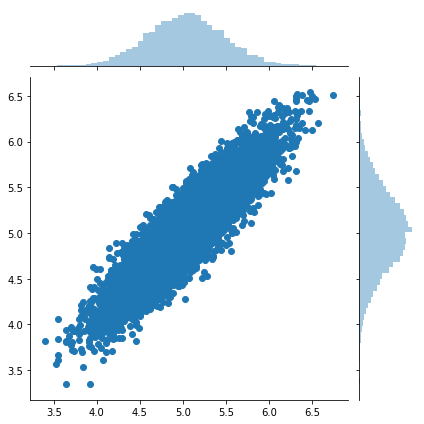

In [2]:
mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])

samples = gibbs_sampling(mus, sigmas)
sns.jointplot(samples[:, 0], samples[:, 1])

Pretty good, huh?

Gibbs Sampling is one hell of an algorithm. It's so simple, yet took me a long time to get the intuition.